In [1]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
from cycler import cycler


In [4]:
df = pd.read_csv("mta_data\mta_7_24_4.csv")

In [24]:
top = df[(df.group != "NumberOfItemsclaimed") & (df.group != "NumberOfLostArticles")].sort_values("amount", ascending = False).head(24)

In [25]:
top

,amount,group,item
45,55151,Tickets,MTA Metrocard
178,50891,Cell Phone/Telephone/Communication Device,Cell phone
139,49498,Wallet/Purse,Wallet
187,46299,Identification,Debit Card
67,44772,Currency,Cash
167,33471,Miscellaneous,All Other Misc Items
193,25014,Identification,Credit Card
202,21561,Identification,Drivers License
192,19347,Identification,School ID
118,19290,Carry Bag / Luggage,Shopping bag


## Ok so, here is the game plan
### Instead of graphing these lost items in boring bars, I'll 
    1) estimate the length of each item
    2) multiple length and number
    3) divide by the length of an average MTA train, which is 377 feet.
### But I'm Chinese, so let's go with metric system, like everyone else in the world, everyone but Americans

### 377 feet = 115 m

Length:

**MTA Metrocard:** 3.4 inches, or **8.6 cm**

**Cell Phone:** 5 inches, or **12.7 cm**

**Wallet & Purse:** differs between fold and long wallets, so let's say 7 inches, or **17.78 cm**

**Debit Card & Credit Card:** 3.37 inches, or **8.55 cm**

**Drivers License, School ID, Insurance Card, Identification Card, Benefit Card, Membership card, Employment ID, Social Security Card:** 3.37 inches, or **8.55 cm**

**Shopping Bags:** Let's say 15 inches, or **38.1 cm**

**Eye glasses:** 5.5 inches, or **14 cm**

**ID Holder:** 4 inches, or **10.16 cm**

**Tote bag & backpack:** 16 inches, or **41 cm**

**Pants/trousers/shorts:** This is a tough one ... 26 inches?, or **66 cm**

~~**Cash:** Not gonna graph cash~~

~~**All Other Misc Item:** Not gonna graph this, either~~

### Okay that's 10 items, yay!

In [26]:
top.drop(columns = ["group"], inplace = True)

In [84]:
new = [{"item":"metrocard", "len_cm":8.6, "amount":55151}, 
       {"item":"phone", "len_cm":12.7, "amount":50891}, 
       {"item":"wallet", "len_cm":17.78, "amount":61476}, 
       {"item":"debit_credit_card", "len_cm":8.55, "amount":71313},
       {"item":"id", "len_cm":8.55, "amount":121145},
       {"item":"shopping bag", "len_cm":38.1, "amount":19290},
       {"item":"eyeglass", "len_cm":14, "amount":9784},
       {"item":"id holder", "len_cm":10.16, "amount":9732},
       {"item":"bags", "len_cm":41, "amount":25024},
       {"item":"pants and shorts", "len_cm":66, "amount":7584}]

In [46]:
df1 = pd.DataFrame(new)

In [91]:
df1

,amount,item,len_cm,total_len_cm,total_len_train
0,55151,metrocard,8.60,474298.60,41.243357
1,50891,phone,12.70,646315.70,56.201365
2,61476,wallets,17.78,1093043.28,95.047242
3,71313,debit_credit_card,8.55,609726.15,53.019665
4,121145,id,8.55,1035789.75,90.068674
5,19290,shopping_bags,38.10,734949.00,63.908609
6,9784,eye_glasses,14.00,136976.00,11.910957
7,9732,id_holder,10.16,98877.12,8.598010
8,25024,tote_backpack,41.00,1025984.00,89.216000
9,7584,pants_shorts,66.00,500544.00,43.525565


In [42]:
def get_total_len_cm(row):
    total_len = row["len_cm"] * row["amount"]
    return total_len

In [48]:
df1["total_len_cm"] = df1.apply(get_total_len_cm, axis = 1)

In [50]:
def get_total_len_train(row):
    total_len_train = row["total_len_cm"] / 11500
    return total_len_train

In [51]:
df1["total_len_train"] = df1.apply(get_total_len_train, axis = 1)

## Now graph!

### x-axis is item
### y-axis is ... if we line them up, what's their length in terms of mta trains

In [65]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    
    "font.family" : "sans-serif",

## Make it MTA colors
    
    "axes.prop_cycle"   : cycler('color', ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#A7A9AC', "#FCCC0A", "#808183", "#EE352E", "#00933C", "#B933AD"]),
    
    "axes.axisbelow"      : True,

    "xtick.minor.visible"  : False,
    "ytick.minor.visible"  : False,

    "date.autoformatter.year"     : "%Y",
    "date.autoformatter.month"    : "%Y-%M",
    "date.autoformatter.day"      : "%Y-%M-%d",


    "grid.color"       :   "white",
    "grid.linestyle"   :   "dashed",
    "grid.linewidth"   :   1,
})

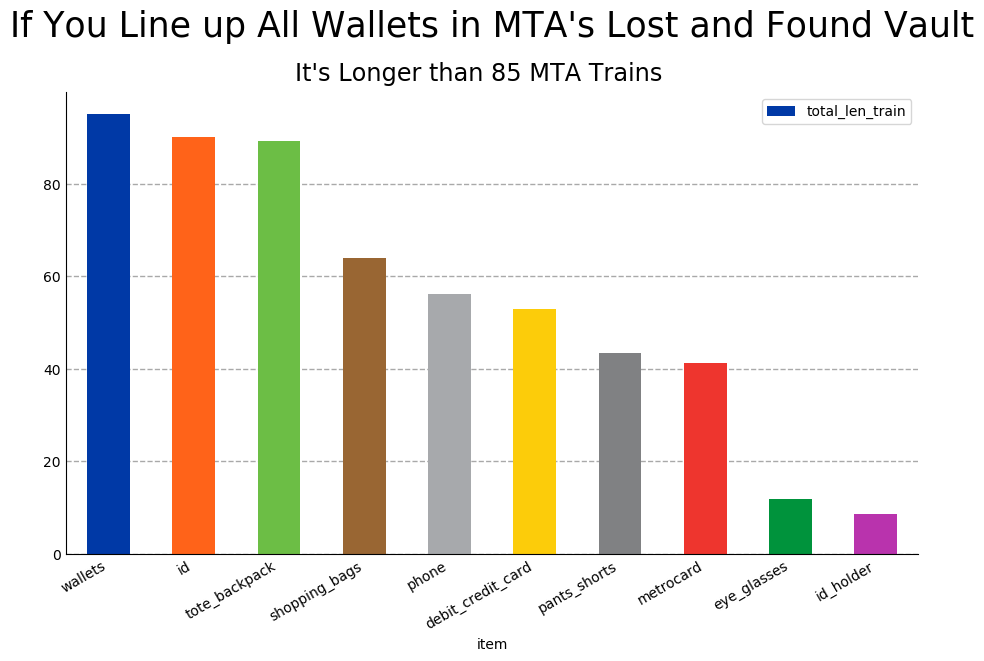

In [90]:
ax = df1.sort_values("total_len_train", ascending = False).plot(x = "item", y = "total_len_train", kind = "bar", color = ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#A7A9AC', "#FCCC0A", "#808183", "#EE352E", "#00933C", "#B933AD"], rot = 0, figsize = (11, 6))

ax.set_title("If You Line up All Wallets in MTA's Lost and Found Vault", pad = 40)
ax.title.set_fontsize(25)

fig = plt.gcf()
fig.text(0.5, 0.9, "It's Longer than 85 MTA Trains", fontsize = "xx-large", ha = "center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.savefig("mta_second_draft.pdf")
plt.show()